# Distributions and Sampling

In [1]:
# Early imports, to get these out of the way
from scipy import stats

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Initial Concepts

### Discrete vs. Continuous Variables and their Distributions

A fundamental distinction among kinds of distributions is the distinction between discrete and continuous distributions. 

A **discrete distribution** (or variable) takes on countable values, like integers, where every outcome has a positive probability.

A **continuous distribution** takes on a continuum of values, like real numbers. It assigns probabilities to ranges of values (not any one single value)

![](https://miro.medium.com/max/1022/1*7DwXV_h_t7_-TkLAImKBaQ.png)

[More Explanation](https://mathbitsnotebook.com/Algebra1/FunctionGraphs/FNGContinuousDiscrete.html)

### Center, Spread and Shape

You can then start to think about how to describe distributions.

More specifically, the **center** refers loosely to the middle-values of a distribution, and is measured more precisely by notions like the mean, the median, and the mode.

The **spread** refers loosely to how far away the more extreme values are from the center, and is measured by some value showing variation - more precisely by the standard deviation, which is effectively a measure of the average distance away from the mean.

![different spread representations](images/examplesOfSpread.jpg)

The **shape** refers loosely how the data shows up when visualized, more specifically capturing details like symmetry or skew, as well as the number of peaks in the distribution.

![different distribution shapes](images/shapesOfDistributions.jpg)

Note that sometimes the center of your distribution is harder to capture precisely, if the shape is skewed:

![examples of skewed distributions](images/order_of_mean_median_mode.png)

[Image Source for the images in this cell](http://mathcenter.oxford.emory.edu/site/math117/shapeCenterAndSpread/)

## Probability Distribution Functions

### Probability Mass Functions (PMF) / Probability Density Functions (PDF) & Cumulative Density Functions (CDF)

(I know, "Probability Distribution Functions" and "Probability Density Functions" have the same acronym. PDF normally stands for the latter - the former is a more catch-all term for all three of these)

![example graphs of a continuous cdf with corresponding pdf and discrete cdf with corresponding pmf](images/pmf-pdf-cdf.png)

[Image Source](https://stats.stackexchange.com/questions/107563/do-the-pdf-and-the-pmf-and-the-cdf-contain-the-same-information)

## Distribution Types

### Bernoulli Distribution 

The **Bernoulli** distribution shows the outcome of a single trial where there are only 2 possible options.

The easiest example is a single coin flip of a fair coin.

In [2]:
possible_flips = ['Tails', 'Heads']
possible_flips

['Tails', 'Heads']

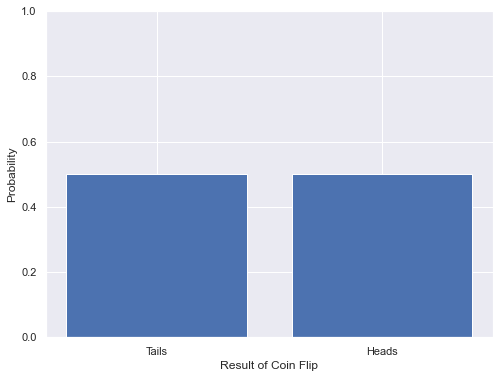

In [3]:
# visualize it
plt.figure(figsize=(8,6))

plt.bar(possible_flips, height=(1/2))

plt.ylabel('Probability')
plt.xlabel('Result of Coin Flip')
plt.ylim(0, 1)
plt.show()

In [4]:
# since it's only 2 things, just creating the dict here
cdf_flip = {'Tails':.5, 'Heads':1}

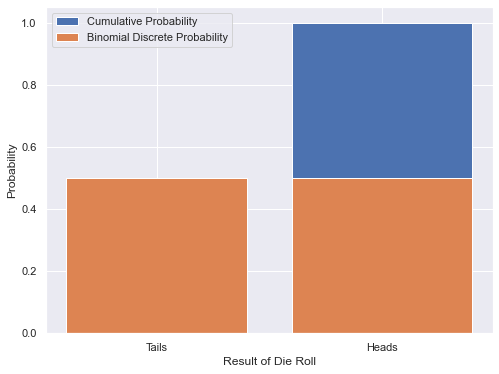

In [5]:
# visualize it
plt.figure(figsize=(8,6))

plt.bar(cdf_flip.keys(), height=cdf_flip.values(), label='Cumulative Probability')
plt.bar(possible_flips, height=(1/2), label='Binomial Discrete Probability')

plt.ylabel('Probability')
plt.xlabel('Result of Die Roll')
plt.legend()
plt.show()

A note - Bernoulli distributions do not need to showcase a fair and balanced trial, as was the case above. Let's look really quickly at a game where the chance of winning is only 10%:

In [6]:
possible_outcomes = {'Lose':.9, 'Win':.1}
possible_outcomes

{'Lose': 0.9, 'Win': 0.1}

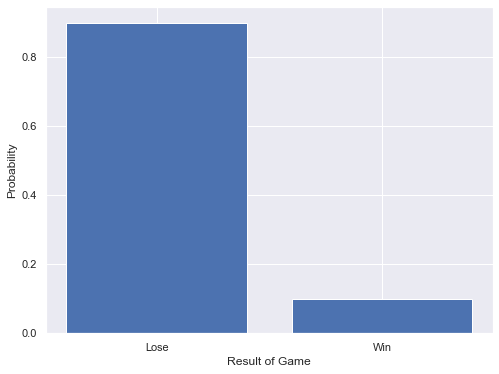

In [7]:
# visualize it
plt.figure(figsize=(8,6))

plt.bar(possible_outcomes.keys(), height=possible_outcomes.values())

plt.ylabel('Probability')
plt.xlabel('Result of Game')
plt.show()

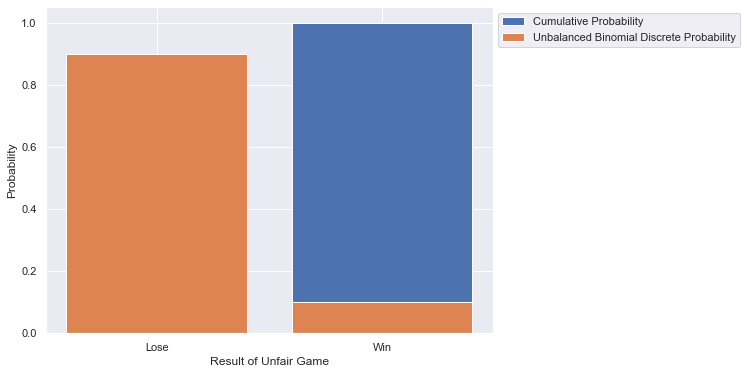

In [8]:
# visualize it
plt.figure(figsize=(8,6))

plt.bar(possible_outcomes.keys(), height=[.9,1], label='Cumulative Probability')
plt.bar(possible_outcomes.keys(), height=possible_outcomes.values(), label='Unbalanced Binomial Discrete Probability')

plt.ylabel('Probability')
plt.xlabel('Result of Unfair Game')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

Another note - a Bernoulli distribution is not the same as a **Binomial** distribution.

- Bernoulli shows the probable results of a single trial with only 2 outcomes
- Binomial shows the probable summed results of MANY trials with only 2 outcomes

### Uniform

The **Uniform** distribution applies when all possible values of the variable are _equally probable_. 

If I'm rolling a fair die, then the six possible outcomes are all equally probable. That is, the chance that I roll a 1 is 1 in 6, as is the chance that I roll a 2 etc.

In [9]:
possible_rolls = list(range(1,7))
possible_rolls

[1, 2, 3, 4, 5, 6]

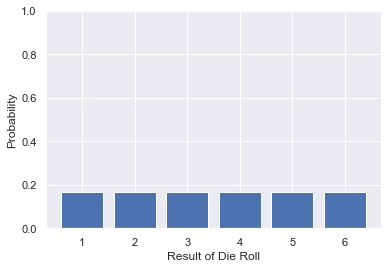

In [10]:
# visualize it
plt.bar(possible_rolls, height=(1/6))

plt.ylabel('Probability')
plt.xlabel('Result of Die Roll')
plt.ylim(0, 1)
plt.show()

In [11]:
# using dictionary comprehension (!!) to get the CDF
cdf_roll = {roll: (roll/6) for roll in possible_rolls}
cdf_roll

{1: 0.16666666666666666,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.6666666666666666,
 5: 0.8333333333333334,
 6: 1.0}

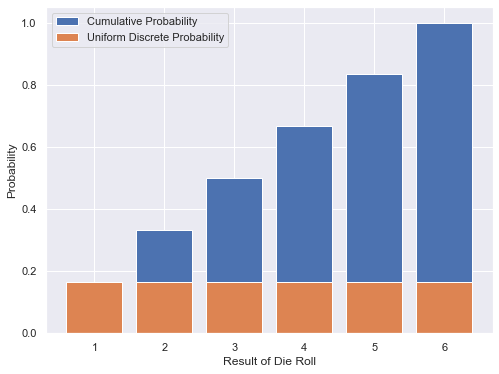

In [12]:
# visualize it
plt.figure(figsize=(8,6))
plt.bar(cdf_roll.keys(), height=cdf_roll.values(), label='Cumulative Probability')
plt.bar(possible_rolls, height=(1/6), label='Uniform Discrete Probability')

plt.ylabel('Probability')
plt.xlabel('Result of Die Roll')
plt.legend()
plt.show()

### Standard Normal Distribution (Gaussian)

<img src='https://github.com/learn-co-students/dsc-0-09-12-gaussian-distributions-online-ds-ft-031119/blob/master/normalsd.jpg?raw=true' width=700/>

[Practice](https://www.intmath.com/counting-probability/normal-distribution-graph-interactive.php)

The Empirical Rule states that 68% of the values of a normal distribution lie within 1 standard deviation of the mean, 95% within 2 standard deviations, and 99.7% within 3.

In [14]:
stats.norm.ppf(0.01)

-2.3263478740408408

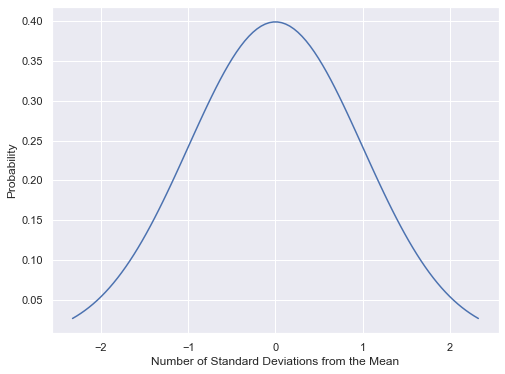

In [13]:
# Getting our normal distribution PDF,
# as shown in an example in the scipy.stats.norm documentation
x = np.linspace(stats.norm.ppf(0.01),
                stats.norm.ppf(0.99), 100)

# visualize it
plt.figure(figsize=(8,6))

plt.plot(x, stats.norm.pdf(x))

plt.ylabel('Probability')
plt.xlabel('Number of Standard Deviations from the Mean')
plt.show()

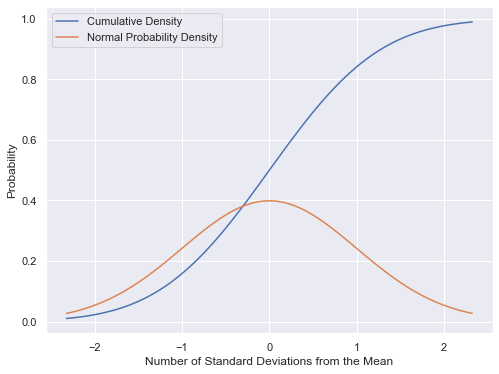

In [15]:
plt.figure(figsize=(8,6))

plt.plot(x, stats.norm.cdf(x), label="Cumulative Density")
plt.plot(x, stats.norm.pdf(x), label="Normal Probability Density")

plt.ylabel('Probability')
plt.xlabel('Number of Standard Deviations from the Mean')
plt.legend()
plt.show()

#### Z-Score 

When working with normal distributions, you can calculate the **z-score** for a specific point, which is just the number of standard deviations the point is away from the mean:

$$z = \frac{x-\mu}{\sigma}$$ 


In [16]:
(20 - 15) / 2

2.5

#### Standardizing Normal Distributions

![showcasing a normal distribution getting standardized](images/standardizedistribution.png)

### But that's not all...

![](images/distributiontypes.png)

[Image Source](https://towardsdatascience.com/probability-distributions-in-data-science-cce6e64873a7)

# Sampling & Point Estimates 

> The sample statistic is calculated from the sample data and the population parameter is inferred (or estimated) from this sample statistic. Let me say that again: Statistics are calculated, parameters are estimated. - James Jones

**Know the differences - Population v Sample Terminology**

Characteristics of populations are called *parameters*<br/>
Characteristics of a sample are called *statistics*

<img src="https://media.cheggcdn.com/media/7ac/7ac1a812-3b41-4873-8413-b6a7b8fab530/CL-26481V_image_006.png" width=700>

Let's work through an example to understand this topic better. We grabbed wage and classification information for 11,616 City of Seattle Employees (as of February 2021).

Details: https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd

In [18]:
!ls data/

City_of_Seattle_Wage_Data_Feb2021.csv


In [19]:
# Grab our data
df = pd.read_csv('data/City_of_Seattle_Wage_Data_Feb2021.csv')

In [20]:
df.head()

,Department,Last Name,First Name,Job Title,Hourly Rate
0,Police Department,Aagard,Lori,Pol Lieut,80.07
1,Police Department,Aakervik,Dag,Pol Ofcr-Detective,60.84
2,Parks & Recreation,Aamot,Allison,Rec Attendant *,17.85
3,Seattle Public Utilities,Aar,Abdimallik,"Civil Engrng Spec,Sr",55.64
4,Parks & Recreation,Aban,Eduardo,"Civil Engr,Sr",60.05


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11616 entries, 0 to 11615
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Department    11616 non-null  object 
 1   Last Name     11616 non-null  object 
 2   First Name    11616 non-null  object 
 3   Job Title     11616 non-null  object 
 4   Hourly Rate   11616 non-null  float64
dtypes: float64(1), object(4)
memory usage: 453.9+ KB


In [23]:
# Thing to note - the column name 'Hourly Rate ' has a space at the end
df.columns[0].strip()

'Department'

In [29]:
# So let's rename the columns
col_names = [c.strip(" ") for c in df.columns]

In [31]:
df.columns = col_names

In [33]:
# Check our work'
df.columns

Index(['Department', 'Last Name', 'First Name', 'Job Title', 'Hourly Rate'], dtype='object')

What we'll do is grab a random sample, of 500 employees, and see how the sample statistics match up with our population parameters.

In [34]:
# gonna use the random library to add randomness
import random

# seed for reproducibility (not too random)
random.seed(2021) 

In [66]:
# set our parameters
sample_size = 500
total_employees = len(df)

In [67]:
#Pick 5 random employees by index number
random_ints = random.sample(range(total_employees), sample_size)

In [68]:
sample = df.iloc[random_ints]

In [69]:
sample

,Department,Last Name,First Name,Job Title,Hourly Rate
5467,Seattle City Light,Keeney,Darrell,Elctn-Con,51.220
900,Human Services Department,Bernstein,Mark,Counslr,37.770
7405,Fire Department,Moury,Kathleen,"Personnel Spec,Asst",33.140
1095,Parks & Recreation,Bonn,Jesse,"Gardener,Sr",33.700
6708,Finance & Admin Services,Masmela,Nonila,Property Mgmt Spec,56.300
...,...,...,...,...,...
8693,Information Technology,Rice,Craig,Info Technol Prof B-BU,59.905
6922,Police Department,McKenna,Patrick,Actg Tech II-BU,30.140
4464,Parks & Recreation,Helgeson,David,"Gardener,Sr",33.700
2439,Human Services Department,Dang,Thuy-Marie,Counslr,37.770


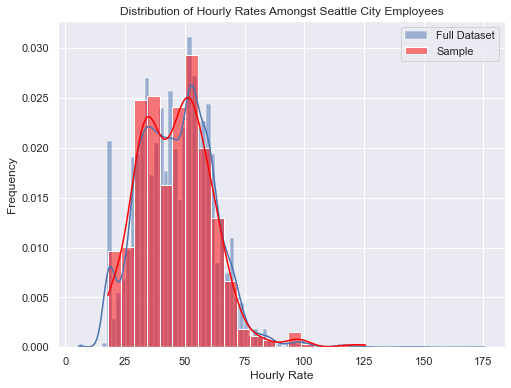

In [70]:
#Make a visualization that shows the distribution of hourly rate

plt.figure(figsize=(8,6))

sns.histplot(df['Hourly Rate'], label='Full Dataset', stat='density', kde=True)
sns.histplot(sample['Hourly Rate'], label='Sample', stat='density', kde=True, color='red', alpha=.5)

plt.xlabel("Hourly Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Hourly Rates Amongst Seattle City Employees")
plt.legend()
plt.show()

Another comparison: 

In [71]:
print("Full Dataset:")
print(df.describe())
print("*" * 20)
print("Sample:")
print(sample.describe())

Full Dataset:
        Hourly Rate
count  11616.000000
mean      46.680978
std       15.467828
min        5.530000
25%       34.660000
50%       46.610000
75%       57.260000
max      175.450000
********************
Sample:
       Hourly Rate
count   500.000000
mean     46.042990
std      15.404844
min      17.850000
25%      34.050000
50%      46.125000
75%      55.600000
max     125.720000


So, how'd our sample do?

- 


## Additional Resources

THERE ARE SO MANY.

- [This YouTube explainer from ZedStatistics, on Probability Distribution Functions](https://www.youtube.com/watch?v=YXLVjCKVP7U)
- [This DataCamp tutorial walks through many more distribution examples in Python](https://www.datacamp.com/community/tutorials/probability-distributions-python)
- [This KDNuggets Blog walks through many different distributions and their uses](https://www.kdnuggets.com/2020/06/overview-data-distributions.html)
- More of a general stats resource: [HackerRank's 10 Days of Statistics](https://www.hackerrank.com/domains/tutorials/10-days-of-statistics)
- [Penn State's Stats Course on Introduction to Probability Theory](https://online.stat.psu.edu/stat414/), which very thoroughly discusses different distributions as well as probability


FYI: For statistics in general, [Crash Course Statistics](https://www.youtube.com/playlist?list=PLH2l6uzC4UEW3iJO4T0qUeUEp_X-f1U7S) is my favorite set of videos, and they have several on topics like [Distributions](https://youtu.be/bPFNxD3Yg6U), [Z-Scores and Percentiles](https://youtu.be/uAxyI_XfqXk), and [The Normal Distribution](https://youtu.be/rBjft49MAO8)